In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

--2024-10-01 10:26:28--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv.4’

laptops.csv.4       100%[===================>] 291.58K  --.-KB/s    in 0.04s   

2024-10-01 10:26:28 (6.59 MB/s) - ‘laptops.csv.4’ saved [298573/298573]



In [4]:
df = pd.read_csv('laptops.csv')

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
df = df[['ram','storage','screen','final_price']]
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


### EDA

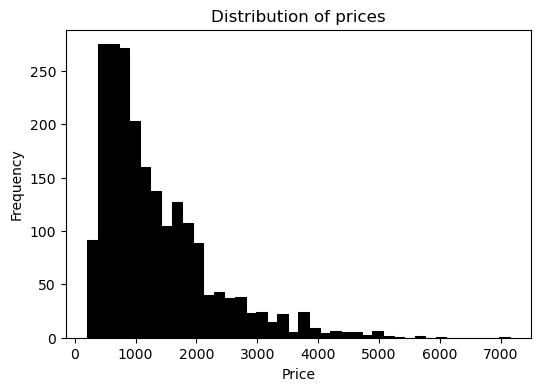

In [7]:
plt.figure(figsize=(6, 4))

sns.histplot(df.final_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [8]:
log_price = np.log1p(df['final_price'])


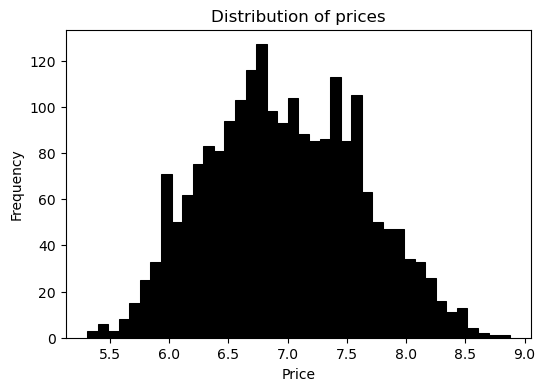

In [9]:

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [10]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [11]:
df['screen'].isnull().sum()

4

In [12]:
df.median()

ram              16.000
storage         512.000
screen           15.600
final_price    1031.945
dtype: float64

In [13]:
df['screen'].describe()

count    2156.000000
mean       15.168112
std         1.203329
min        10.100000
25%        14.000000
50%        15.600000
75%        15.600000
max        18.000000
Name: screen, dtype: float64

In [14]:
# Missing values with zero
df['screen'] = df['screen'].fillna(0)

In [15]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)


idx = np.arange(n)
np.random.shuffle(idx)
idx

df_shuffler = df.iloc[idx]
df_shuffler

df_train = df_shuffler.iloc[:n_train].copy()
df_val = df_shuffler.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffler.iloc[n_train+n_val:].copy()


In [16]:
# Missing values with mean
#df_train['screen'] = df_train['screen'].fillna(df_train['screen'].mean())

In [17]:
df_train

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00
...,...,...,...,...
1777,8,256,14.0,549.00
183,32,1000,16.0,1999.00
137,16,512,15.6,1059.00
899,16,512,14.0,1671.00


In [18]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [19]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [20]:
df_val

,ram,storage,screen
132,32,1000,16.0
80,16,512,15.6
1706,12,512,15.6
1769,8,256,13.6
541,8,512,15.6
...,...,...,...
2137,8,128,13.0
1003,8,256,13.3
1913,8,512,14.0
1976,16,512,14.0


In [21]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [22]:
X_train = df_train.values
X_val = df_val.values
X_test = df_test.values

In [23]:
w_0, w = train_linear_regression(X_train, y_train)

In [24]:
y_pred = w_0 + X_Val.dot(w)

In [25]:
y_pred.shape

In [26]:
y_pred

In [34]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [28]:
len(y_pred)

In [29]:
round(rmse(y_val, y_pred),2)

### Regularization

In [35]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [56]:
w_0, w = train_linear_regression_reg(X_train, y_train, 0.01)

In [57]:
y_pred = w_0 + X_val.dot(w)


In [58]:
for r=0.01
rmse(y_val, y_pred)

0.42885163605340293